# Data Exploration
## for covid-19 cases and deaths + hospital capacity data
first let's confirm the correct libraries are installed. For more information on how to set-up your Jupyter Notebook check out the `README.md`

**Datasets:**
- Hospital Capacity by Facility
- Weekly U.S. COVID-19 Cases and Deaths by County

**Team Member Responsible:** Szymon Sarnowicz

**Mentor:** Dr. Chris Teplovs

In [1]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
import importlib

def install_if_not_exists(module_names):
    for module_name in module_names:
      try:
          importlib.import_module(module_name)
          print(f"{module_name} is already installed.")
      except ImportError:
          %pip install {module_name}
          print(f"{module_name} has been installed.")

In [3]:
required_modules = ["pandas", "matplotlib", "seaborn", "numpy", "scipy", "IPython", "scikit-learn"]
install_if_not_exists(required_modules)

pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
numpy is already installed.
scipy is already installed.
IPython is already installed.
scikit-learn has been installed.



In [4]:
import os
import inspect
from itertools import repeat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy.stats import zscore, shapiro
from scipy.optimize import curve_fit
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Enable inline plotting in Jupyter notebook
%matplotlib inline

In [6]:
data_deaths = "data/Weekly_United_States_COVID-19_Cases_and_Deaths_by_County_-_ARCHIVED_20240113.csv"
data_hosp = "data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_20240114.csv"

In [7]:
df_d = pd.read_csv(data_deaths)
df_h = pd.read_csv(data_hosp)

C:\Users\szymo\AppData\Local\Temp\ipykernel_18844\420344896.py:2: DtypeWarning: Columns (0,3,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h = pd.read_csv(data_hosp)


In [8]:
df_d.shape

(566056, 9)

In [9]:
df_h.shape

(486943, 128)

In [10]:
list(df_d.columns)

['fips_code',
 'county',
 'state',
 'state_fips',
 'date',
 'cumulative_cases',
 'cumulative_deaths',
 'New cases',
 'New deaths']

In [11]:
list(df_h.columns)

['hospital_pk',
 'collection_week',
 'state',
 'ccn',
 'hospital_name',
 'address',
 'city',
 'zip',
 'hospital_subtype',
 'fips_code',
 'is_metro_micro',
 'total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_used_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
 'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
 'total_p

In [12]:
# let's explore some of the data
df_h.describe()

,zip,fips_code,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,inpatient_beds_used_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
count,486935.000000,486475.000000,346876.000000,313257.000000,444846.000000,475665.000000,446349.000000,444589.000000,410345.000000,449929.000000,...,246821.000000,273338.000000,486942.000000,273338.000000,383289.000000,486942.000000,383289.000000,382485.000000,486942.000000,382485.000000
mean,54050.671205,29320.121638,-948.776878,-2154.892778,-5232.935671,-83448.173186,-84101.752554,-341148.230773,-339924.369770,-344473.689822,...,-6794.361902,-31898.195918,3.834783,-16598.293878,-43187.306142,5.338845,-10570.735959,-18005.446673,5.330645,-4334.699293
std,26836.659680,16194.847549,33389.470843,47960.831998,73019.339546,276743.259697,277710.961903,474104.942969,473692.686172,475203.859894,...,82147.720349,175729.309340,3.442437,127761.575851,203283.597243,2.902220,102337.547035,132982.569075,2.908765,65855.518265
min,603.000000,1001.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,-999999.000000,...,-999999.000000,-999999.000000,0.000000,-999999.000000,-999999.000000,0.000000,-999999.000000,-999999.000000,0.000000,-999999.000000
25%,33040.000000,17031.000000,28.000000,25.700000,22.400000,9.900000,9.100000,-999999.000000,-999999.000000,-999999.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,5.000000,0.000000
50%,55362.000000,28147.000000,73.000000,66.300000,52.000000,33.700000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000
75%,76065.000000,42085.000000,224.825000,201.000000,166.000000,132.600000,125.000000,9.400000,9.000000,7.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000
max,99901.000000,78020.000000,6660.000000,3987.000000,2866.100000,2960.100000,2498.000000,1315.000000,1302.000000,1301.400000,...,252.000000,77.000000,7.000000,231.000000,273.800000,7.000000,1876.000000,651.000000,7.000000,2492.000000


In [13]:
df_d.describe()

,fips_code,state_fips,cumulative_cases,cumulative_deaths,New cases,New deaths
count,566056.000000,566056.000000,5.660560e+05,566056.000000,566056.000000,566056.000000
mean,31365.304707,31.264059,1.525134e+04,199.138587,184.725322,2.001733
std,16300.250804,16.285385,6.711034e+04,794.291176,1261.291430,15.070889
min,1000.000000,1.000000,0.000000e+00,0.000000,-48876.000000,-4161.000000
25%,19026.500000,19.000000,4.480000e+02,6.000000,4.000000,0.000000
50%,30022.000000,30.000000,2.563000e+03,42.000000,23.000000,0.000000
75%,46101.250000,46.000000,8.925000e+03,132.000000,93.000000,1.000000
max,72153.000000,72.000000,3.742471e+06,36049.000000,276668.000000,1694.000000


## Dataset Clean-Up Functions

In [14]:
# Create a dictionary with each entry as columns_h[i]: 'sum'
def get_agg_dict(columns:list) -> dict:
    return {col: 'max' for col in columns}

In [15]:
def get_merged_data(weekly_aggregated_cases_STATE:pd.core.frame.DataFrame, weekly_aggregated_hospitals_STATE:pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    
    merged_df = pd.merge(weekly_aggregated_cases_STATE, weekly_aggregated_hospitals_STATE, on=['year', 'week', 'is_metro_micro'])
    merged_df['date'] = pd.to_datetime(merged_df['year'].astype(str) + merged_df['week'].astype(str) + '1', format='%Y%U%w')
    merged_df = merged_df.drop(columns=['year', 'week']).set_index('date')

    # Set the threshold count (52 in this case aka at least 1-years worth of data)
    threshold_count = 52

    # Filter columns based on count
    selected_columns = merged_df.columns[merged_df.count() >= threshold_count]

    # Create a new DataFrame with selected columns
    merged_df = merged_df[selected_columns]
    
    print("The shape of the merged_df is", merged_df.shape[0], "by", merged_df.shape[1])
    assert sum(merged_df['is_metro_micro'].unique() == 1), "The column 'is_metro_micro' should only have 0 or 1 as values"
    
    return merged_df

In [16]:
def shift_df(df:pd.core.frame.DataFrame, columns_to_remove:list, shift:int) -> pd.core.frame.DataFrame:
    
    columns_to_shift = [item for item in list(df.columns) if item not in columns_to_remove]
    df[columns_to_shift] = df[columns_to_shift].shift(shift)
    return df

In [17]:
def get_df_sub_state_cleaned(df:pd.core.frame.DataFrame, 
                             columns_to_filter:list, 
                             date_col:str='collection_week',
                             state:str='MI',
                             merge_county_data_enabled:bool=False, 
                             county_df:pd.core.frame.DataFrame=None) -> pd.core.frame.DataFrame:
    
    if (date_col == 'collection_week'):
        columns_for_subset = ['collection_week', 'state', 'hospital_name', 'is_metro_micro', 'geocoded_hospital_address'] + columns_to_filter
    else:
        columns_for_subset = ['fips_code', 'state', 'date'] + columns_to_filter

    df_sub = df[columns_for_subset].copy()
    df_sub[date_col] = pd.to_datetime(df_sub[date_col])
    df_sub['year'] = df_sub[date_col].dt.year
    df_sub['week'] = df_sub[date_col].dt.isocalendar().week
        
    # Replace negative values with 0 (negative values are insertion errors)
    df_sub[columns_to_filter] = df_sub[columns_to_filter].map(lambda x: max(0, x))

    df_sub[columns_to_filter] = df_sub[columns_to_filter].replace(0, np.nan)
    
    # exploring hospital data per STATE (default MI aka Michigan)
    df_STATE = df_sub[df_sub['state'] == state].copy()
    
    if merge_county_data_enabled:
        # Check if county_df is None
        county_df = county_df.drop_duplicates(subset='fips_code')
        assert county_df is not None, "Input DataFrame 'county_df' cannot be None"
        df_STATE = pd.merge(df_STATE, county_df, on='fips_code')

    df_STATE['is_metro_micro'] = df_STATE['is_metro_micro'].astype(int)


    
    return df_STATE

In [18]:
def save_cleaned_data_per_state(states:list):
    current_directory = str(os.getcwd()).replace('\\','/')
    print(f"saving files to {current_directory}")

    for state in states:
        folder_path = f"/data/outputs/{state}"
        file_name_h = f"/df_h_sub_cleaned_{state}.csv"
        file_name_d = f"/df_d_sub_cleaned_{state}.csv"
        output_folder_path = current_directory + folder_path

        df_h_sub_cleaned = get_df_sub_state_cleaned(df_h, columns_h, date_col='collection_week', state=state)
        df_d_sub_cleaned = get_df_sub_state_cleaned(df_d, columns_d, date_col='date', state=state, merge_county_data_enabled=True, county_df=county_df)

        # Check if the folder exists; if not, create it
        if not os.path.exists(output_folder_path):
            os.makedirs(output_folder_path)
            print(output_folder_path)

        print(f"saving data for {state} ...")
        df_h_sub_cleaned.to_csv((output_folder_path + file_name_h), index=False)
        df_d_sub_cleaned.to_csv((output_folder_path + file_name_d), index=False)

In [19]:
def get_weekly_aggregated_data(df_sub_STATE:pd.core.frame.DataFrame, columns:list) -> pd.core.frame.DataFrame:  

    weekly_aggregated_STATE = df_sub_STATE.groupby(['year', 'week', 'is_metro_micro']).agg(get_agg_dict(columns)).reset_index()

    assert sum(weekly_aggregated_STATE['is_metro_micro'].unique() == 1), "The column 'is_metro_micro' should only have 0 or 1 as values"
    
    return weekly_aggregated_STATE

In [20]:
def get_correlation_columns(merged_df:pd.core.frame.DataFrame, 
                            columns_to_correlate:list, 
                            show_heat_map_enabled:bool, 
                            norm_dist:bool=True) -> tuple:
    """
    If you're observing NaN values in the correlation matrix heatmap, it might be due to a situation where the standard deviation of one of the columns involved in the correlation calculation is zero. This can happen when the data in one of the columns is constant across all rows.
    In a correlation calculation, when the standard deviation is zero, the denominator in the correlation formula becomes zero, leading to division by zero and resulting in NaN values.
    To handle this situation, you can preprocess your data to handle constant columns or columns with zero variance.
    """
    
    high_correlation_arr = []
    correlation_matrix_arr = []
    strong_corr_val = 0.7
    large_data_threshold = 52 # 1 year worth of data

    for category in range(2):

        metro_micro_df =  merged_df[merged_df['is_metro_micro'] == category]

        # Identify and drop constant columns
        constant_columns = metro_micro_df.columns[metro_micro_df.nunique() == 1]
        metro_micro_df = metro_micro_df.drop(columns=constant_columns)

        # Select the specified columns along with all other columns in the DataFrame
        selected_columns = columns_to_correlate + metro_micro_df.columns.difference(columns_to_correlate).tolist()
        
        # Calculate the correlation matrix for the selected columns

        if norm_dist:
            correlation_matrix = metro_micro_df[selected_columns].corr()
        else:
            correlation_matrix = metro_micro_df[selected_columns].corr(method='spearman')
            
        correlation_matrix = correlation_matrix.dropna(how='all')
        correlation_matrix = correlation_matrix.dropna(axis=1, how='all')
        
        # display correlation heat map
        if show_heat_map_enabled:
            show_heat_map(correlation_matrix.loc[columns_to_correlate], category)

        # get high correlation columns for new cases
        high_correlation_columns_new_cases = (correlation_matrix.loc[columns_to_correlate].columns[(correlation_matrix.loc[columns_to_correlate[0]].abs() > strong_corr_val) &
                                                                                                   (correlation_matrix.loc[columns_to_correlate[0]].abs() < 1)]).tolist()
        # get high correlation columns for new deaths
        high_correlation_columns_new_deaths = (correlation_matrix.loc[columns_to_correlate].columns[(correlation_matrix.loc[columns_to_correlate[1]].abs() > strong_corr_val) &
                                                                                                    (correlation_matrix.loc[columns_to_correlate[1]].abs() < 1)]).tolist()

        for high_correlation_columns in [high_correlation_columns_new_cases, high_correlation_columns_new_deaths]:
            # remove the columns that are already being correlated
            high_correlation_columns[:] = [col for col in high_correlation_columns if col not in columns_to_correlate]
            # check that the column has a reasonable amount of data for that category
            high_correlation_columns[:] = [col for col in high_correlation_columns if (metro_micro_df[col].dropna().shape[0] > large_data_threshold)]
        
        high_correlation_arr.append((high_correlation_columns_new_cases, high_correlation_columns_new_deaths))
        correlation_matrix_arr.append(correlation_matrix.loc[columns_to_correlate].copy())
        
    return high_correlation_arr[0], high_correlation_arr[1], correlation_matrix_arr[0], correlation_matrix_arr[1]

In [21]:
def check_norm_dist(merged_df:pd.core.frame.DataFrame, high_correlation_columns_rural:list, high_correlation_columns_urban:list):
    norm_dist = False
    alpha = 0.05
    is_metro_micro_text = list(repeat("rural",2)) + list(repeat("urban",2))
    for i, high_corr_cols in enumerate([high_correlation_columns_rural[0], high_correlation_columns_urban[0]
                                        , high_correlation_columns_rural[1], high_correlation_columns_urban[1]]):
        for col in high_corr_cols:
            
            statistic, p_value = shapiro(merged_df[col].dropna())
            
            if p_value > alpha:
                print("Column:", col)
                print("Shapiro-Wilk Test Statistic:", statistic)
                print("p-value:", p_value)
                print(f"The {is_metro_micro_text[i]} data in column {col} looks normally distributed (fail to reject H0)")
                print()
                norm_dist = True
            else:
                pass

        if (norm_dist == False) and (i % 2 == 0):
            print(f"None of the {is_metro_micro_text[i]} data is normally distributed (reject H0)")

    return norm_dist

## Data Visualization Functions

In [22]:
def show_heat_map(correlation_matrix:pd.core.frame.DataFrame, category:int=1):
    
    if (category == 1):
        title_text = "Urban"
    else:
        title_text = "Rural"
    
    # Plot the correlation heatmap
    plt.figure(figsize=(30, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={'rotation': 90})
    plt.title(f'Correlation Heatmap In {title_text} Areas')
    plt.show()

In [23]:
def model_func(x, a, b):
    return a * x + b

In [24]:
# Specify the columns for the scatter plot
def get_corr_plot(merged_df:pd.core.frame.DataFrame, 
                  corr_matrix_sub_rural:pd.core.frame.DataFrame,
                  corr_matrix_sub_urban:pd.core.frame.DataFrame,
                  high_correlation_arr:list, 
                  x_col:str,
                  state:str,
                  shift:int=0):
    
    # initialize variables
    category = 'is_metro_micro'
    colors = ['#f8e71c', '#01afd1', '#666666'] # yellow, blue, grey
    size = 90
    alpha = 0.6

    sample_data_rural = merged_df[merged_df[category] == 0].copy()
    sample_data_urban = merged_df[merged_df[category] == 1].copy()
    sample_data = [sample_data_rural, sample_data_urban]

    avg_x_arr = []

    for col in high_correlation_arr:
        
        # initialize the y_col
        y_col = col
        avg_y_arr = []

        # Plot the scatter plot with different colors for each category
        plt.figure(figsize=(7, 5))

        for j, data in enumerate(sample_data):
            if j == 0:
                corr_val = corr_matrix_sub_rural[col].loc[x_col]
            else:
                corr_val = corr_matrix_sub_urban[col].loc[x_col]
            
            # Normalize the data
            
            avg_y = data[y_col].mean()

            if len(avg_x_arr) < 2:
                avg_x = data[x_col].mean()
                data[x_col] /= avg_x

                if (shift % 2 == 0):
                    avg_x_arr.append(avg_x)
                else:
                    avg_x_arr.insert(0, avg_x)
                

            avg_y_arr.append(avg_y)
            
            data[y_col] /= avg_y
            
            # Plot normalized data
            if (j == 0):
                sns.scatterplot(data=data, x=x_col, y=y_col, color=colors[0], edgecolor=colors[0], s=size, alpha=alpha, label='Rural')
            else:
                sns.scatterplot(data=data, x=x_col, y=y_col, color=colors[1], edgecolor=colors[1], s=size, alpha=alpha, label='Urban')

            # Fit the model to the data
            data.dropna(subset=[x_col, y_col], inplace=True)
            xdata = data[x_col].values
            ydata = data[y_col].values

            params, covariance = curve_fit(model_func, xdata, ydata)

            x_fit = np.linspace(xdata.min(), xdata.max(), 100)  # Generates 100 points between min and max of xdata
            y_fit = model_func(x_fit, *params)  # Use the fitted parameters

            # Plot the predicted data points
            if (j == 0):
                plt.plot(x_fit, y_fit, '-', color=colors[0], alpha=(alpha-0.1), linewidth=4)
            else:
                plt.plot(x_fit, y_fit, '-', color=colors[1], alpha=(alpha-0.1), linewidth=4)

            plt.annotate(f'ρ = {(corr_val):.2f}', xy=(x_fit[np.argmax(y_fit)], y_fit.max()), 
                         xytext=(x_fit[np.argmax(y_fit)] + 0.1, y_fit.max() + 0.1),
                         color=colors[j], fontsize=10, fontweight='bold')

        plt.tight_layout()
        # Remove the border
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)

        # Remove xlabel and ylabel
        plt.xlabel('')
        plt.ylabel('')
       
        # Adjust x-axis and y-axis tick frequency
        x_locs, x_labels = plt.xticks()
        x_locs = x_locs[1:] # Remove the first element
        x_labels = x_labels[1:] # Remove the first element

        # Multiply each label by a value and add units
        # print("x_labels:",x_labels)
        if any(avg > 1e6 for avg in avg_x_arr):
            # print("dividing by 1e6")
            dividor = 1e3
            dividor_tag = 'k'
            format_spec = '.0f'
        else:
            dividor = 1
            dividor_tag = ''
            format_spec = '.1f'

        x_label_tag = (x_col.split('_'))[1]

        adjusted_x_labels = [f'{(float(label.get_text()) * avg_x_arr[0] / dividor):.1f}{dividor_tag} new rural {x_label_tag}\n{(float(label.get_text()) * avg_x_arr[1] / dividor):{format_spec}}{dividor_tag} new urban {x_label_tag}' if (float(label.get_text()) * avg_x_arr[0] / dividor) < 10 
                            else f'{int(float(label.get_text()) * avg_x_arr[0] / dividor)}{dividor_tag} new rural {x_label_tag}\n{int(float(label.get_text()) * avg_x_arr[1] / dividor)}{dividor_tag} new urban {x_label_tag}' for label in x_labels]

        adjusted_x_labels = ['' if ('0.0' in label) else label for label in adjusted_x_labels]

        plt.xticks(x_locs[::4], adjusted_x_labels[::4], fontsize=12) # Set xticks to show every other whole number
        
        y_locs, y_labels = plt.yticks()
        y_locs = y_locs[1:] # Remove the first element
        y_labels = y_labels[1:] # Remove the first element
        
        # print("y_labels:",y_labels)
        if 'bed' in col:
            ylabel_text = 'beds used'

        else:
            ylabel_text = 'data'
        
        adjusted_y_labels = [f'{(float(label.get_text()) * avg_y_arr[0]):.1f} rural {ylabel_text}\n{int(float(label.get_text()) * avg_y_arr[1])} urban {ylabel_text}' if (float(label.get_text()) * avg_y_arr[0]) < 10 
                                  else f'{int(float(label.get_text()) * avg_y_arr[0])} rural {ylabel_text}\n{int(float(label.get_text()) * avg_y_arr[1])} urban {ylabel_text}' for label in y_labels]

        adjusted_y_labels = ['' if '0.0' in label else label for label in adjusted_y_labels]
        plt.yticks(y_locs[::3], adjusted_y_labels[::3], fontsize=12) # Set yticks to show every other whole number
            
        plt.gca().xaxis.label.set_color(colors[2])
        plt.gca().yaxis.label.set_color(colors[2])

        # Change color of all text to grey
        plt.setp(plt.gca().get_xticklabels(), color=colors[2])
        plt.setp(plt.gca().get_yticklabels(), color=colors[2])

        # Set x and y axis limits to be above 0
        plt.xlim(-0.1, None)  # Set x-axis lower limit to 0 and upper limit to None (automatic)
        plt.ylim(-0.1, None)  # Set y-axis lower limit to 0 and upper limit to None (automatic)

        # Shift x-labels to the left
        for i, label in enumerate(plt.gca().get_xticklabels()):
            if i != 0:
                label.set_ha('right')

        # Shift y-labels to the left
        for i, label in enumerate(plt.gca().get_yticklabels()):
            if i != 0:
                label.set_va('top')

        # Add lines at the positions of the xticks
        for loc in x_locs[::4]:
            if loc != 0:  # Don't draw a line at x=0
                plt.gca().axvline(loc, color=colors[2], alpha=0.2, linestyle='-', linewidth=1)

        # Add lines at the positions of the yticks
        for loc in y_locs[::3]:
            if loc != 0:  # Don't draw a line at y=0
                plt.gca().axhline(loc, color=colors[2], alpha=0.2, linestyle='-', linewidth=1)

        # Remove tick marks
        plt.gca().tick_params(axis='both', length=0)

        # Move legend outside of the plot
        legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize=12, frameon=False)

        # Change color of legend text
        for text in legend.get_texts():
            text.set_color(colors[2])

        # Set the title
        plt.title('')
        if shift > 0:
            title = f"{(y_col.replace('_',' '))} vs {(x_col.replace('_',' '))} in {state}\nshifted by {shift} week(s)"
        else:
            title = f"{(y_col.replace('_',' '))} vs {(x_col.replace('_',' '))} in {state}"

        # Add a new title completely to the left
        plt.text(-0.31, 1.01, title, ha='left', va='bottom', transform=plt.gca().transAxes, color=colors[2], fontsize=14, fontweight='bold')

        plt.show()

In [25]:
# get_df_sub_state_cleaned(df_d, columns_d, date_col='date', state='MI', merge_county_data_enabled=True, county_df=county_df)

## Main Function

In [26]:
def main(df_d:pd.core.frame.DataFrame, 
         df_h:pd.core.frame.DataFrame, 
         county_df:pd.core.frame.DataFrame, 
         columns_d:list, 
         columns_h:list, 
         state:str='MI',
         shift:int=0,
         display_tables_enabled:bool=False,
         show_heat_map_enabled:bool=False,
         display_corr_charts:bool=False):
    
    print(f"\ncreating sub hospital dataframe for {state}")
    df_h_sub = get_df_sub_state_cleaned(df_h, columns_h, date_col='collection_week', state=state)
    # display(df_h_sub.sample(5))
    print("\nsub dataframe complete")
    if display_tables_enabled:
        display(df_h_sub.describe())
    
    print(f"\ncreating sub covid cases/deaths dataframe for {state}")
    df_d_sub = get_df_sub_state_cleaned(df_d, columns_d, date_col='date', state=state, merge_county_data_enabled=True, county_df=county_df)
    # display(df_d_sub.sample(5))
    print("\nsub dataframe complete")
    if display_tables_enabled:
        display(df_d_sub.describe())
    
    print("\naggregating hospital data")
    weekly_aggregated_hospitals = get_weekly_aggregated_data(df_h_sub, columns_h)
    if display_tables_enabled:
        display(weekly_aggregated_hospitals.describe())
    
    print("\naggregating covid cases/deaths data")
    weekly_aggregated_cases = get_weekly_aggregated_data(df_d_sub, columns_d)
    # weekly_aggregated_cases = df_d_sub
    if display_tables_enabled:
        display(weekly_aggregated_cases.describe())
    
    print("\nmerging dataframes on week, year, and is_metro_micro")
    merged_df = get_merged_data(weekly_aggregated_cases_STATE=weekly_aggregated_cases, weekly_aggregated_hospitals_STATE=weekly_aggregated_hospitals)

    if shift != 0:
        print(f"\nshifting data by {shift} week(s)")
        merged_df = shift_df(merged_df, columns_d, shift)

    if display_tables_enabled:
        display(merged_df.describe())
    
    print("\nfinding high correlating columns to covid cases and deaths")
    # Get columns with correlation greater than 0.7 and less than 1 for rural areas
    high_correlation_columns_rural_orig, high_correlation_columns_urban_orig, corr_matrix_sub_rural_orig, corr_matrix_sub_urban_orig = get_correlation_columns(merged_df.copy(), columns_d, show_heat_map_enabled)

    print("\nchecking if found high correlation columns are normally distributed")
    norm_dist = check_norm_dist(merged_df, high_correlation_columns_rural_orig, high_correlation_columns_urban_orig)

    if norm_dist == False:
        print("None of the data is normally distributed, rerunning the correlation with spearman method")
        high_correlation_columns_rural, high_correlation_columns_urban, corr_matrix_sub_rural, corr_matrix_sub_urban = get_correlation_columns(merged_df.copy(), columns_d, show_heat_map_enabled, norm_dist)
    else:
        high_correlation_columns_rural = high_correlation_columns_rural_orig
        high_correlation_columns_urban = high_correlation_columns_urban_orig
        corr_matrix_sub_rural = corr_matrix_sub_rural_orig
        corr_matrix_sub_urban = corr_matrix_sub_urban_orig
    
    for i in range(2):
        for j in range(2):
            print(f"\nHighly correlated columns for {['RURAL', 'URBAN'][i]} areas and NEW {['CASES', 'DEATHS'][j]}:")
            print("---")
            if (len(high_correlation_columns_rural[j]) > 0):
                for col in high_correlation_columns_rural[j]:
                    print(col, "has", merged_df[merged_df['is_metro_micro'] == i][col].dropna().shape[0], "data points")
            else:
                print("No highly correlated columns found")

    print("\nAll highly correlated columns for both RURAL & URBAN AREAs:")
    mutual_cols_new_cases = [item for item in high_correlation_columns_rural[0] if item in high_correlation_columns_urban[0]]
    mutual_cols_new_deaths = [item for item in high_correlation_columns_rural[1] if item in high_correlation_columns_urban[1]]
    print(f'for {columns_d[0]}: {mutual_cols_new_cases if len(mutual_cols_new_cases) > 0 else "No mutual highly correlated columns found"}')
    print(f'for {columns_d[1]}: {mutual_cols_new_deaths if len(mutual_cols_new_deaths) > 0 else "No mutual highly correlated columns found"}')
    print()
    
    if display_corr_charts:
        print("\ndisplaying correlation plots of highly correlated columns")
        get_corr_plot(merged_df.copy(), corr_matrix_sub_rural, corr_matrix_sub_urban, mutual_cols_new_cases, columns_d[0], state, shift=shift) # 0 = cases, 1 = deaths
        get_corr_plot(merged_df.copy(), corr_matrix_sub_rural, corr_matrix_sub_urban, mutual_cols_new_deaths, columns_d[1], state, shift=shift) # 0 = cases, 1 = deaths
    
    return merged_df, high_correlation_columns_rural, high_correlation_columns_urban, corr_matrix_sub_rural, corr_matrix_sub_urban
    

## Hospital Dataset Clean-Up

In [27]:
# let's clean up the hospital data columns for only the ones we want to aggregate
columns_h = list(df_h.columns)[11:]

# remove any column names with influenza or other non-relavant text
"""
Reasons for removing columns:
- influenza: we are not interested in the influenza data
- hhs_ids: hospital ids are not relevant for correlation
- is_corrected: not relevant for correlation
- total_personnel_covid_vaccinated: the team's focus is on bed capacity
- geocoded_hospital_address: only removed at this stage since this datatype is not an integer, and is re-introduced after data conversion
- avg: none of the cases or deaths columns have 'avg' in them, therefore the sum over 7 days is preferred
- previous: not relevant for correlation, additionally other data shifting will be done
"""
substrings_to_exclude = ['influenza', 'hhs_ids', 'is_corrected', 'total_personnel_covid_vaccinated', 'geocoded_hospital_address', 'avg', 'previous']
columns_h = [col for col in columns_h if not any(substring in col for substring in substrings_to_exclude)]

## COVID-19 Cases & Deaths Dataset Clean-Up

In [28]:
# first, rename column names so that they match all other column name formats
column_mapping_d = {'New cases': 'new_cases', 'New deaths': 'new_deaths'}
df_d.rename(columns=column_mapping_d, inplace=True)

In [29]:
# covid death data
df_d.sample(10)

,fips_code,county,state,state_fips,date,cumulative_cases,cumulative_deaths,new_cases,new_deaths
112125,48143,Erath County,TX,48,06/17/2020,35,1,10,0
163009,13227,Pickens County,GA,13,11/18/2020,1031,15,98,1
341821,27101,Murray County,MN,27,11/09/2022,2254,21,9,0
435877,12093,Okeechobee County,FL,12,10/13/2021,7377,120,49,2
88091,38065,Oliver County,ND,38,09/16/2020,16,0,6,0
300132,13185,Lowndes County,GA,13,12/07/2022,35695,424,79,0
96831,41029,Jackson County,OR,41,06/08/2022,45052,546,502,2
403562,51075,Goochland County,VA,51,06/22/2022,4440,53,39,0
449963,17163,St. Clair County,IL,17,03/08/2023,81204,802,195,1
38492,20145,Pawnee County,KS,20,09/15/2021,1241,15,23,1


### merging in urban vs rural data
You may notice that we have an issue here compared to our other dataset. The hospital dataset has information on 'is_metro_micro', however this dataset on covid deaths and cases does not have this differentiation. Therefore we would not be able to combine datasets without losing some of that information, and we cannot assume how the cases and deaths are split up by rural vs urban in this dataset. Therefore we need to extract some more information from the hospital dataset first to be able to combine it with our current dataset. 

The easiest way to do this, is both datasets have location information based on the column 'fips_code'. We will merge the 'is_metro_micro' data onto our deaths/cases dataset on the 'fips_code' column

In [30]:
county_df = df_h[['fips_code', 'is_metro_micro']].dropna()
# county_df = county_df.astype(int)
county_df.head()

,fips_code,is_metro_micro
0,1031.0,True
1,6037.0,True
2,6077.0,True
3,9009.0,True
4,9009.0,True


In [31]:
# let's grab the covid data columns for only the ones we want to aggregate
columns_d = ['new_cases', 'new_deaths']

Let's save some of the data to our output for future manipulation. Uncomment to run, should take around ~20min to go through all 50 states

## Display Correlation Data Per State

### Michigan

For the very first run, I would like to display all relavant information, to better show what the code is doing. Initially we run through cleaning and merging the data per given state. Next we display the correlation and provide the heat map for both urban and rural regions. The correlation is aimed to run through every single hospital dataset column against both `new_deaths` and `new_cases`. For any value that is above 0.7 and is so for both rural and urban correlation, is deemed a strong correlation. We will use these columns to plot the correlations later on.

Furthermore, you may notice that the Shapiro-Wilkins test is performer throughout the function running. It is important to know whether the data is normally distributed, to which correlation method to use. If the data is ***not** normally distributed, then Spearman's method is to be used, and the correlation is re-run for this reason.

Lastly, the function should print out what it is doing, so if there are any questions, I would follow the output first. **The final result is ready to present correlation plots for all highly correlated columns for both urban and rural regions.**


creating sub hospital dataframe for MI

sub dataframe complete


,collection_week,is_metro_micro,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_used_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,all_pediatric_inpatient_beds_7_day_coverage,all_pediatric_inpatient_beds_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum,year,week
count,13743,13743.000000,12975.000000,11824.000000,12304.000000,13281.000000,12119.000000,8143.000000,7373.000000,7894.000000,...,10438.000000,2481.000000,7977.000000,125.00000,10441.000000,1002.000000,10439.000000,1090.000000,13743.000000,13743.0
mean,2022-02-06 05:13:11.355598848,0.775522,1142.829056,1064.235707,930.528202,780.833522,740.406634,109.101805,105.608979,94.340385,...,6.663250,217.197904,6.841670,9.27200,6.665549,118.915170,6.665773,151.485321,2021.580659,27.86313
min,2020-03-01 00:00:00,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,4.000000,1.000000,4.00000,1.000000,4.000000,1.000000,4.000000,2020.000000,1.0
25%,2021-02-28 00:00:00,1.000000,210.000000,203.000000,175.000000,65.000000,66.000000,14.000000,14.000000,13.000000,...,7.000000,39.000000,7.000000,5.00000,7.000000,30.000000,7.000000,53.000000,2021.000000,16.0
50%,2022-01-30 00:00:00,1.000000,385.000000,364.000000,343.000000,210.000000,210.000000,43.000000,43.000000,38.000000,...,7.000000,102.000000,7.000000,6.00000,7.000000,56.000000,7.000000,93.500000,2022.000000,28.0
75%,2023-01-15 00:00:00,1.000000,1677.000000,1673.000000,1372.000000,1111.000000,1116.500000,126.000000,124.000000,108.000000,...,7.000000,175.000000,7.000000,10.00000,7.000000,166.000000,7.000000,179.750000,2023.000000,40.0
max,2023-12-24 00:00:00,1.000000,11403.000000,7910.000000,7210.000000,7419.000000,6214.000000,2022.000000,1942.000000,1868.000000,...,7.000000,4508.000000,7.000000,64.00000,7.000000,1166.000000,7.000000,1771.000000,2023.000000,53.0
std,NaN,0.417253,1553.284785,1364.878523,1202.996977,1187.652680,1057.337930,176.723616,167.328748,153.531520,...,1.226692,389.600646,0.752714,9.24346,1.223732,154.999055,1.221294,193.673497,1.081672,14.57116



creating sub covid cases/deaths dataframe for MI

sub dataframe complete


,fips_code,date,new_cases,new_deaths,year,week,is_metro_micro
count,12283.000000,12283,11259.000000,6449.000000,12283.000000,12283.0,12283.000000
mean,26082.126761,2021-09-15 00:00:00,267.338129,6.472476,2021.231214,25.265896,0.633803
min,26003.000000,2020-01-22 00:00:00,1.000000,1.000000,2020.000000,1.0,0.000000
25%,26041.000000,2020-11-18 00:00:00,17.000000,1.000000,2020.000000,12.0,0.000000
50%,26077.000000,2021-09-15 00:00:00,54.000000,2.000000,2021.000000,24.0,1.000000
75%,26125.000000,2022-07-13 00:00:00,185.000000,5.000000,2022.000000,38.0,1.000000
max,26165.000000,2023-05-10 00:00:00,26646.000000,465.000000,2023.000000,53.0,1.000000
std,47.920582,NaN,905.613411,17.211686,0.987685,15.114397,0.481784



aggregating hospital data


,year,week,is_metro_micro,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_used_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,all_pediatric_inpatient_bed_occupied_7_day_coverage,all_pediatric_inpatient_bed_occupied_7_day_sum,all_pediatric_inpatient_beds_7_day_coverage,all_pediatric_inpatient_beds_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
count,396.000000,396.0,396.000000,396.000000,362.000000,362.000000,394.000000,362.000000,386.000000,354.000000,...,361.000000,221.000000,361.000000,281.000000,238.000000,69.000000,361.000000,181.000000,361.000000,184.000000
mean,2021.575758,27.560606,0.502525,4307.189394,3684.889503,3268.301105,3187.324873,2713.930939,267.652850,245.327684,...,6.855956,787.380090,6.855956,756.583630,6.869748,11.782609,6.855956,318.110497,6.855956,391.945652
std,1.093973,14.621256,0.500626,3702.520517,3055.096963,2748.469835,2914.137354,2386.119799,385.221938,356.749307,...,0.834182,679.456795,0.834182,802.280571,0.787460,11.675602,0.834182,222.417673,0.834182,315.309038
min,2020.000000,1.0,0.000000,28.000000,245.000000,196.000000,64.000000,64.000000,4.000000,4.000000,...,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,21.000000,1.000000,8.000000
25%,2021.000000,15.0,0.000000,555.000000,569.750000,559.750000,231.000000,221.750000,21.000000,22.000000,...,7.000000,185.000000,7.000000,14.000000,7.000000,6.000000,7.000000,188.000000,7.000000,210.000000
50%,2022.000000,28.0,1.000000,1968.000000,1582.000000,1582.000000,1147.500000,914.000000,92.000000,90.500000,...,7.000000,869.000000,7.000000,553.000000,7.000000,7.000000,7.000000,260.000000,7.000000,303.000000
75%,2023.000000,40.0,1.000000,8421.000000,6778.750000,6631.500000,6372.750000,5459.250000,364.250000,325.000000,...,7.000000,1195.000000,7.000000,1282.000000,7.000000,13.000000,7.000000,478.000000,7.000000,597.750000
max,2023.000000,53.0,1.000000,11403.000000,7910.000000,7210.000000,7419.000000,6214.000000,2022.000000,1942.000000,...,7.000000,3646.000000,7.000000,4508.000000,7.000000,64.000000,7.000000,1166.000000,7.000000,1771.000000



aggregating covid cases/deaths data


,year,week,is_metro_micro,new_cases,new_deaths
count,346.000000,346.0,346.000000,331.000000,329.000000
mean,2021.231214,25.265896,0.500000,1720.821752,30.130699
std,0.989075,15.13567,0.500724,3279.862614,57.538253
min,2020.000000,1.0,0.000000,1.000000,1.000000
25%,2020.000000,12.0,0.000000,82.000000,3.000000
50%,2021.000000,24.0,0.500000,427.000000,10.000000
75%,2022.000000,38.0,1.000000,2104.000000,29.000000
max,2023.000000,53.0,1.000000,26646.000000,465.000000



merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 328 by 47


,is_metro_micro,new_cases,new_deaths,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_used_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,all_pediatric_inpatient_bed_occupied_7_day_coverage,all_pediatric_inpatient_bed_occupied_7_day_sum,all_pediatric_inpatient_beds_7_day_coverage,all_pediatric_inpatient_beds_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
count,328.000000,327.000000,325.000000,328.000000,294.000000,294.000000,326.000000,294.000000,326.000000,294.000000,...,293.000000,185.000000,293.000000,232.000000,172.000000,52.000000,293.000000,147.000000,293.000000,149.000000
mean,0.503049,1675.048930,29.818462,4331.317073,3691.326531,3265.823129,3173.886503,2713.738095,303.180982,280.581633,...,6.822526,783.221622,6.822526,749.948276,6.819767,12.519231,6.822526,340.238095,6.822526,425.140940
std,0.500755,3159.593565,57.532232,3695.692949,3025.783832,2727.817516,2919.462664,2396.502711,405.251103,377.437414,...,0.923015,725.380110,0.923015,839.110448,0.922154,12.069229,0.923015,236.953910,0.923015,335.039228
min,0.000000,1.000000,1.000000,28.000000,245.000000,196.000000,64.000000,64.000000,5.000000,5.000000,...,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,21.000000,1.000000,8.000000
25%,0.000000,82.000000,3.000000,546.000000,565.750000,556.500000,203.250000,214.000000,26.000000,26.000000,...,7.000000,152.000000,7.000000,19.500000,7.000000,6.000000,7.000000,196.000000,7.000000,210.000000
50%,1.000000,427.000000,10.000000,1968.000000,1582.000000,1582.000000,1147.500000,914.000000,142.000000,141.000000,...,7.000000,835.000000,7.000000,392.000000,7.000000,8.000000,7.000000,279.000000,7.000000,308.000000
75%,1.000000,2088.000000,29.000000,8083.000000,6231.250000,6159.000000,6373.750000,5473.750000,394.500000,351.250000,...,7.000000,1207.000000,7.000000,1304.000000,7.000000,13.000000,7.000000,504.500000,7.000000,609.000000
max,1.000000,26646.000000,465.000000,11403.000000,7910.000000,7210.000000,7387.000000,6214.000000,2022.000000,1942.000000,...,7.000000,3646.000000,7.000000,4508.000000,7.000000,64.000000,7.000000,1166.000000,7.000000,1771.000000



finding high correlating columns to covid cases and deaths


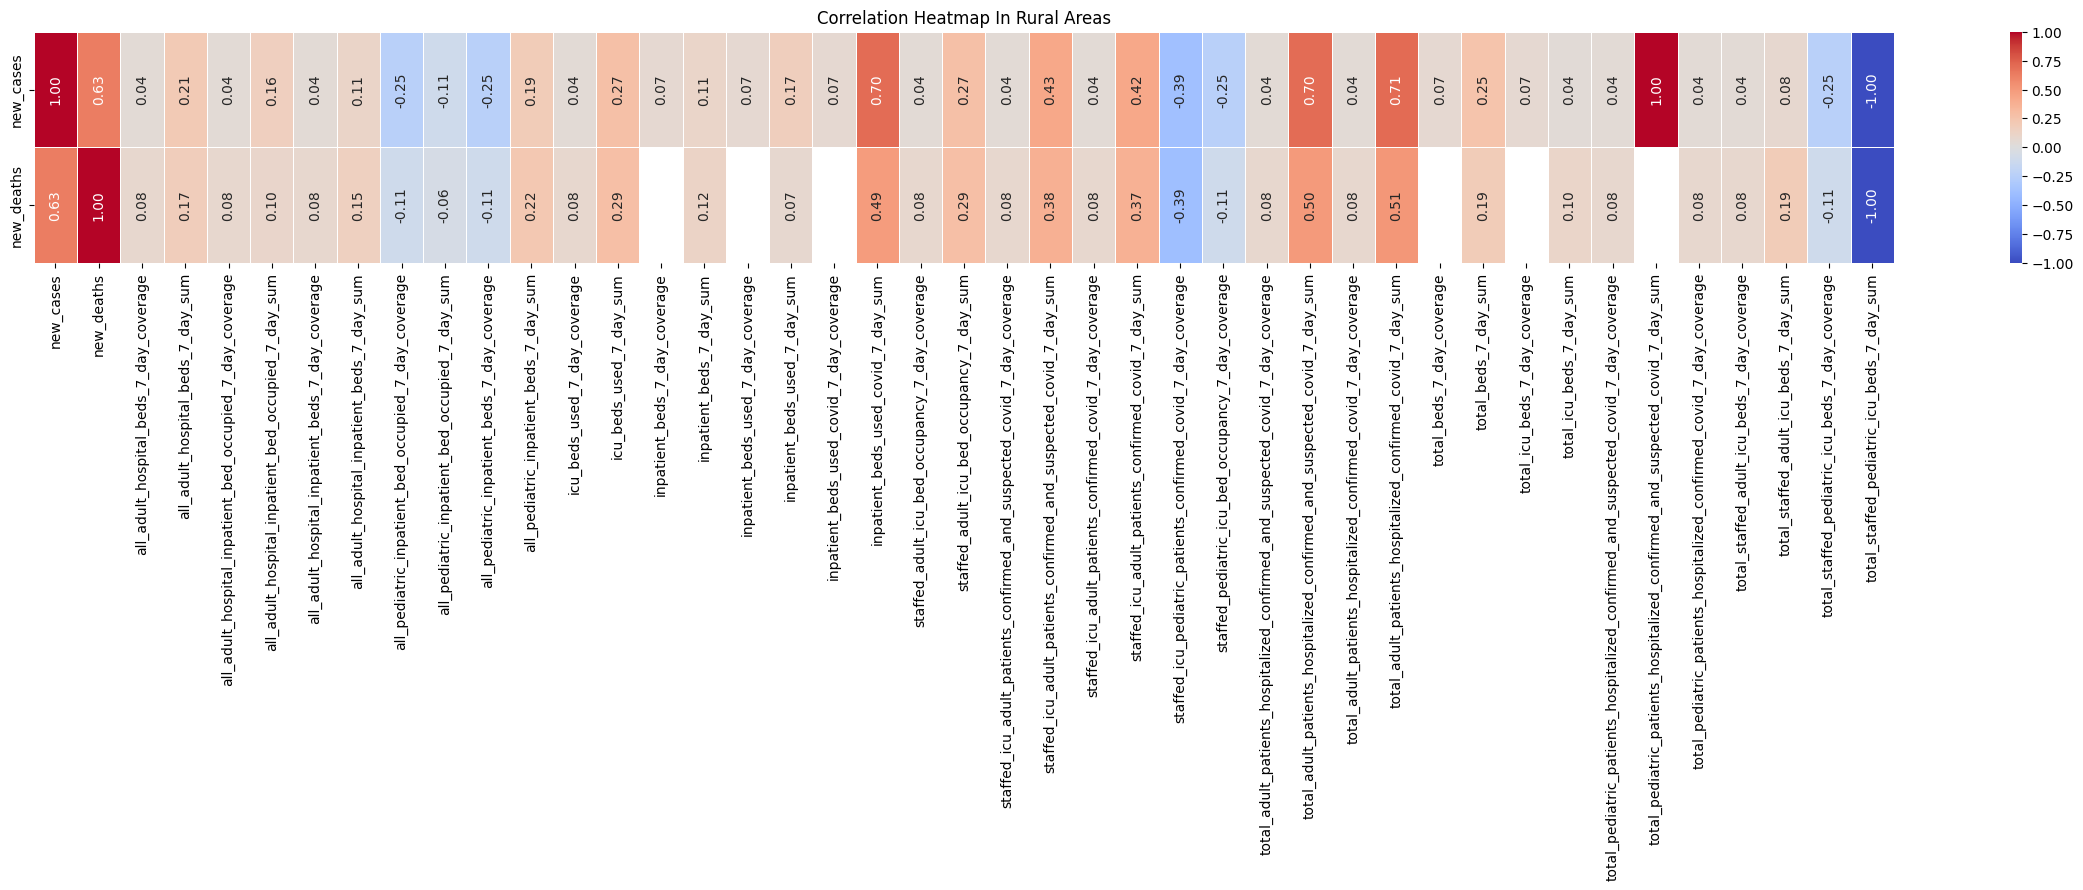

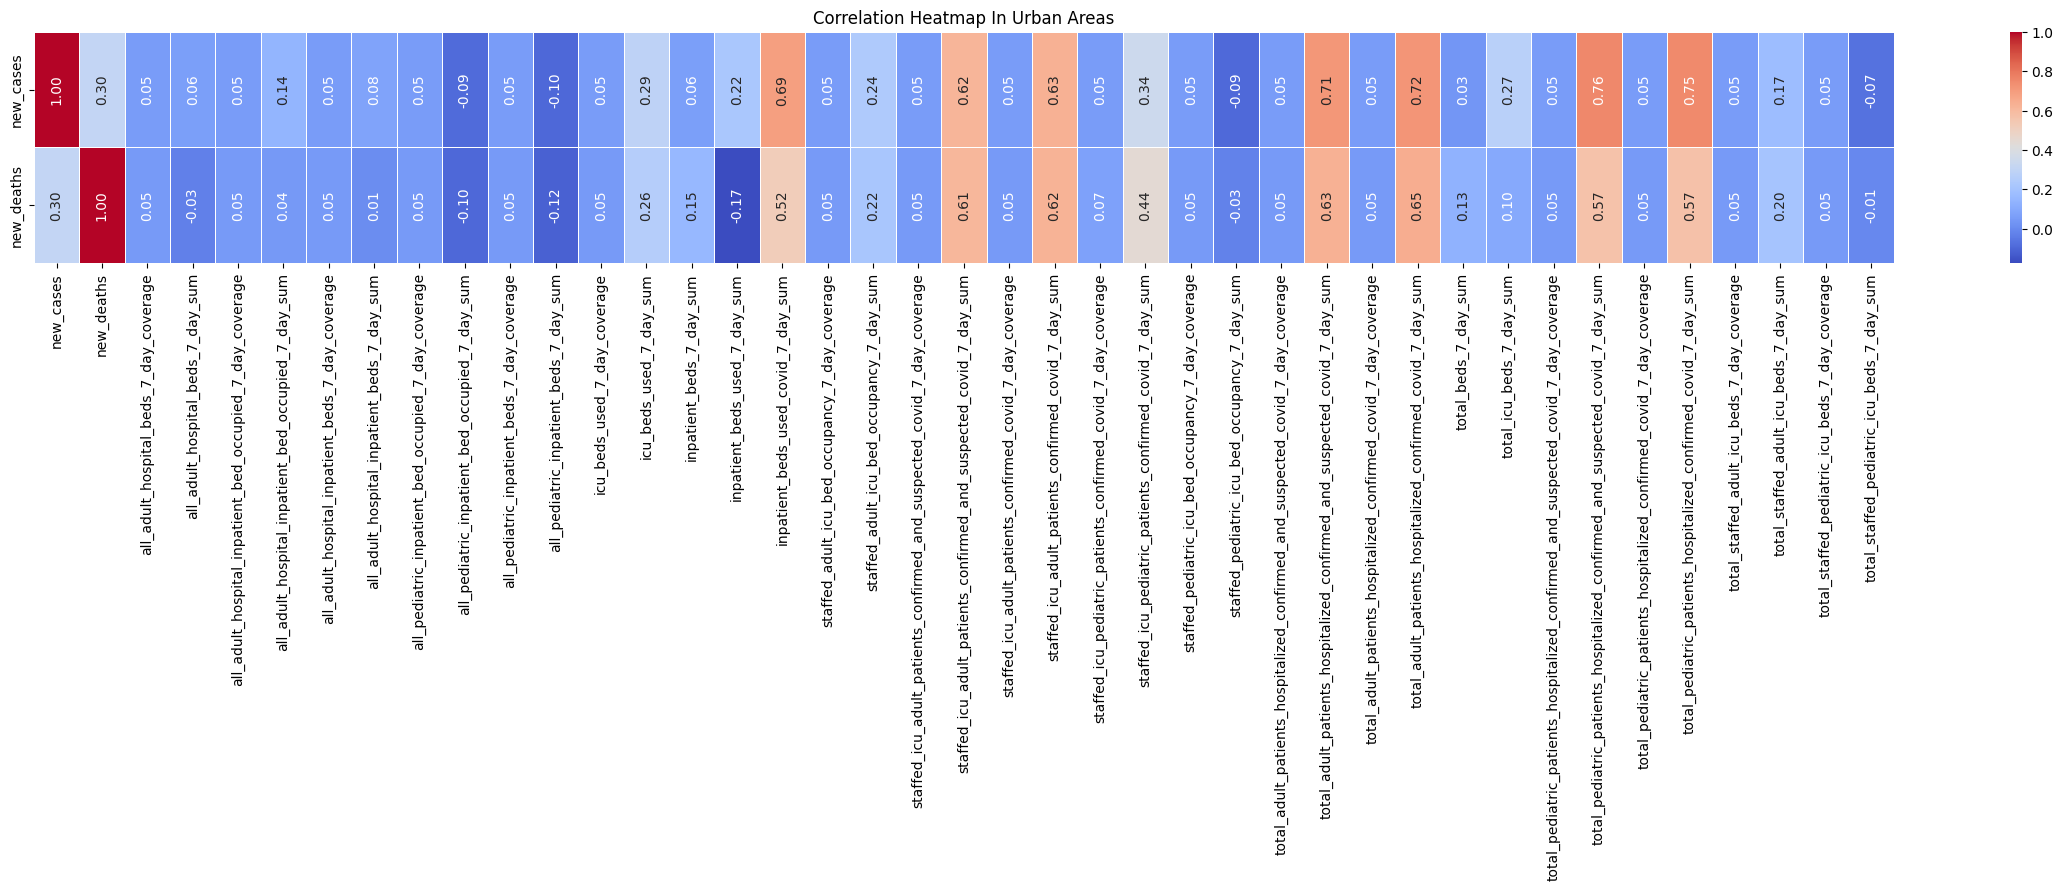


checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method


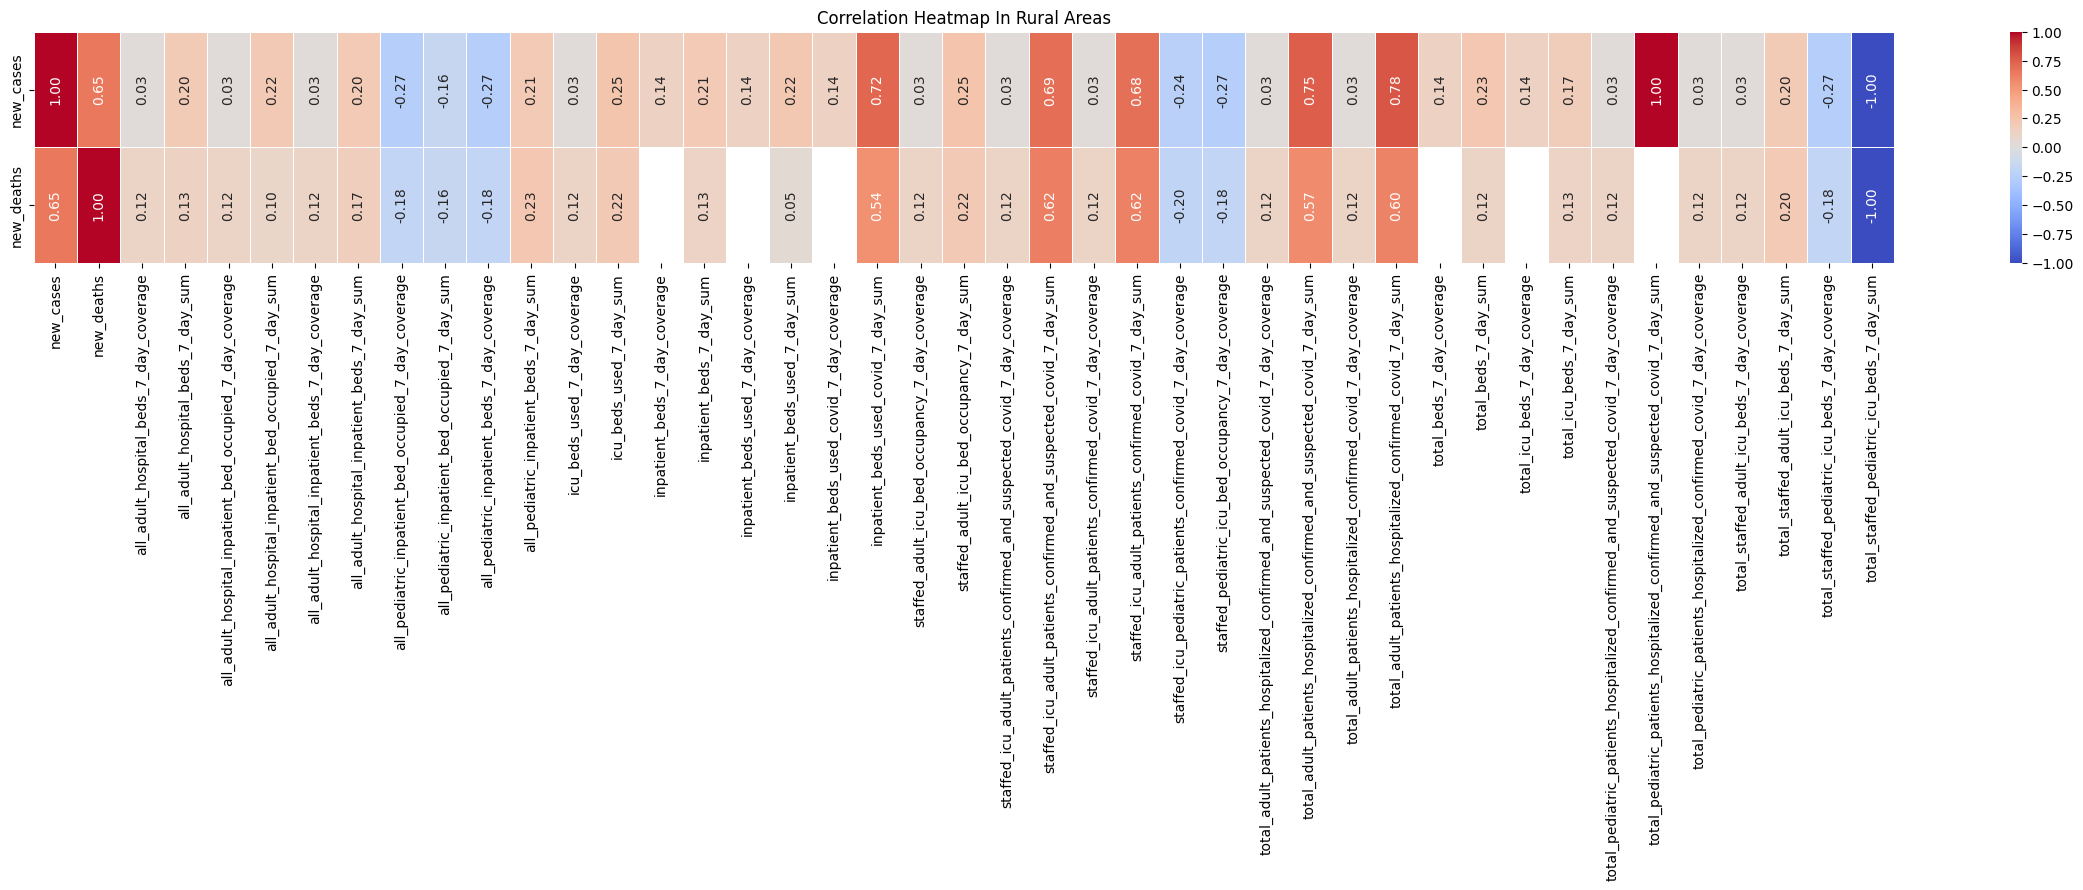

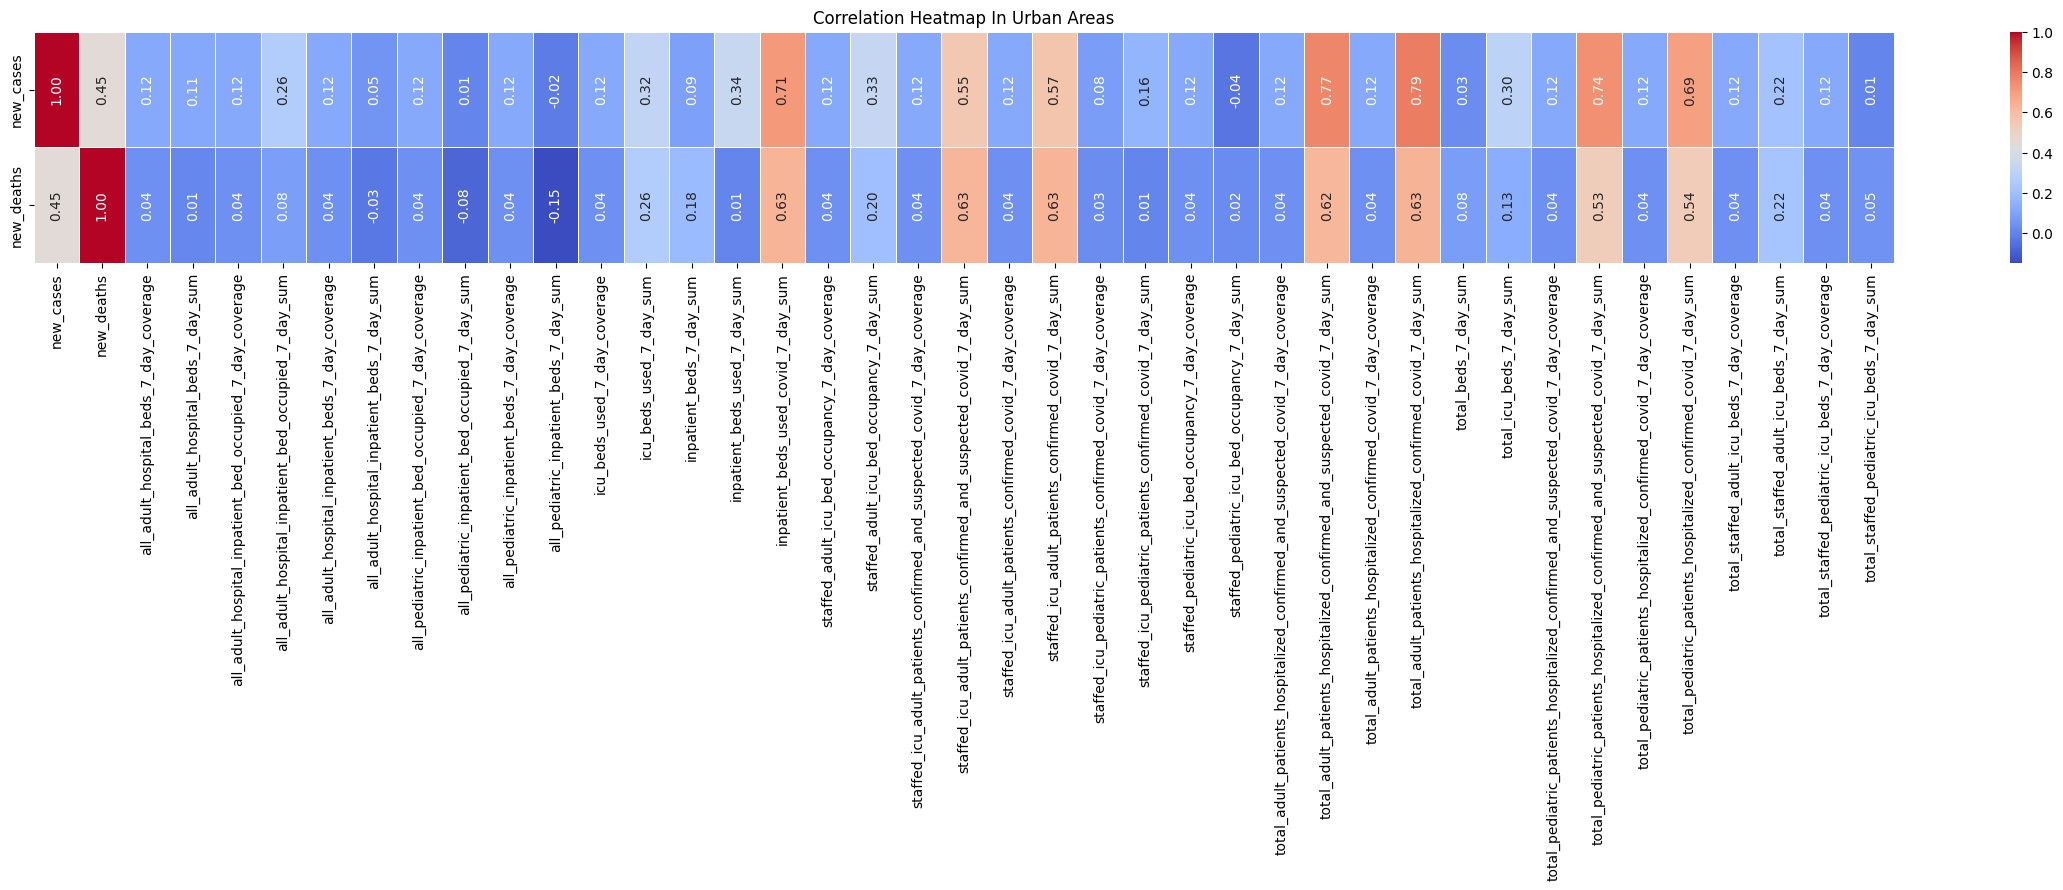


Highly correlated columns for RURAL areas and NEW CASES:
---
inpatient_beds_used_covid_7_day_sum has 162 data points
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum has 147 data points
total_adult_patients_hospitalized_confirmed_covid_7_day_sum has 147 data points

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
inpatient_beds_used_covid_7_day_sum has 164 data points
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum has 147 data points
total_adult_patients_hospitalized_confirmed_covid_7_day_sum has 147 data points

Highly correlated columns for URBAN areas and NEW DEATHS:
---
No highly correlated columns found

All highly correlated columns for both RURAL & URBAN AREAs:
for new_cases: ['inpatient_beds_used_covid_7_day_sum', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum', 'total_adult_patients_hospi

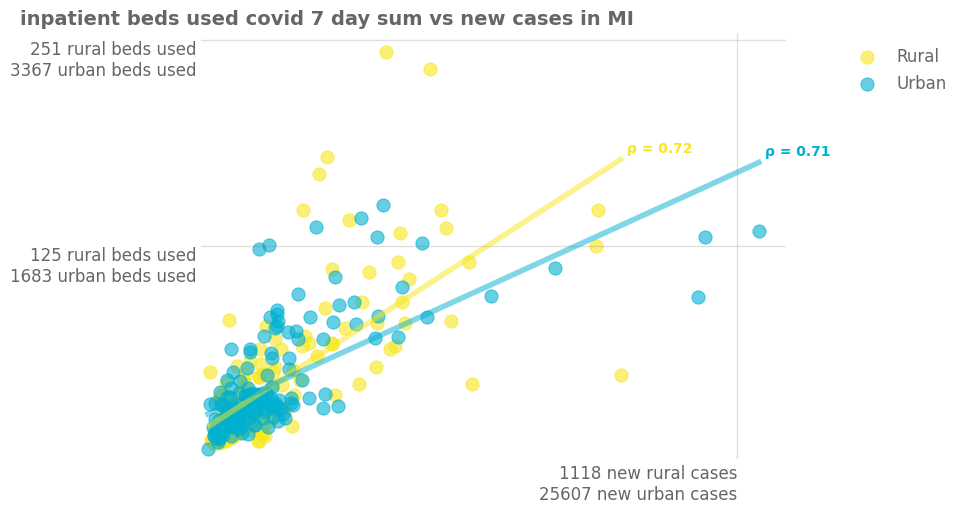

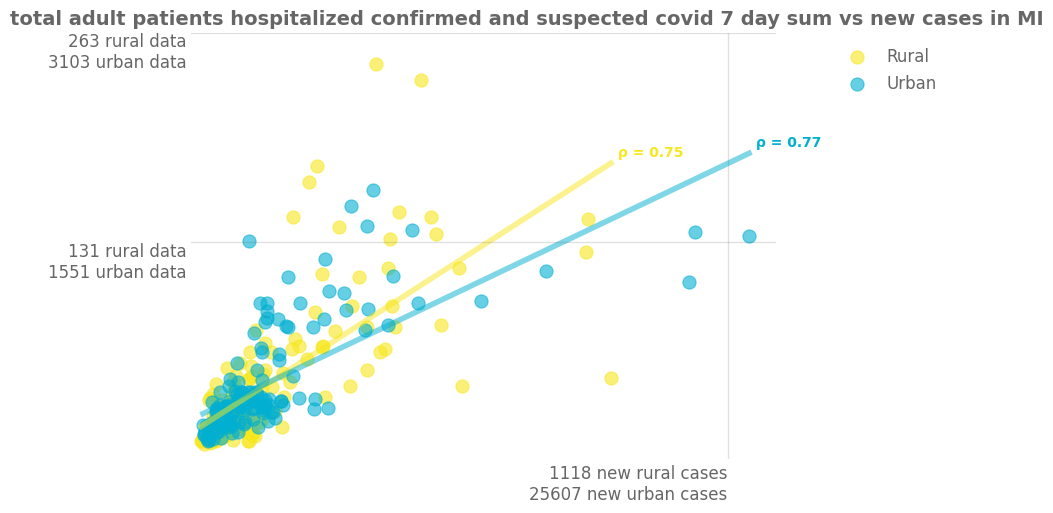

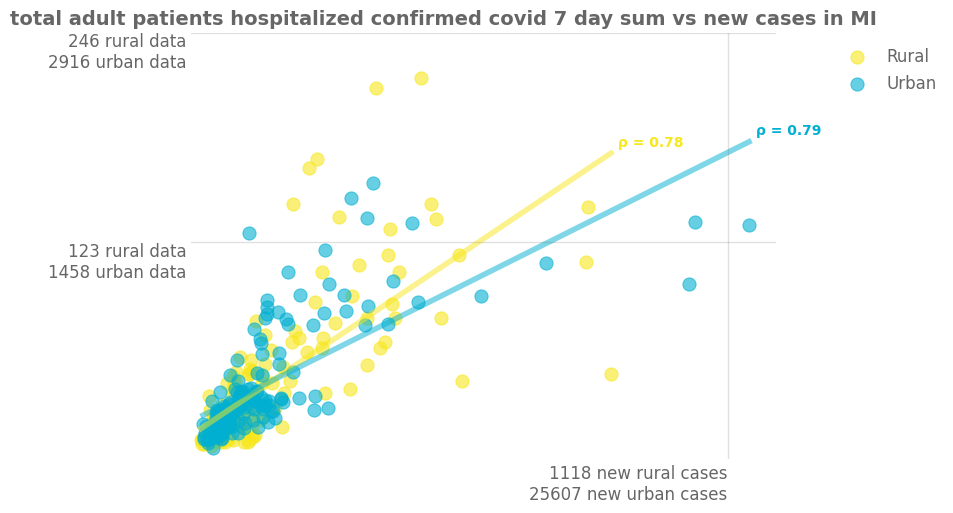

In [32]:
merged_df_MI, high_correlation_columns_rural_MI, high_correlation_columns_urban_MI, corr_matrix_sub_rural_MI, corr_matrix_sub_urban_MI = main(df_d, 
                                                                                                              df_h, 
                                                                                                              county_df, 
                                                                                                              columns_d, 
                                                                                                              columns_h, 
                                                                                                              'MI',
                                                                                                              display_tables_enabled=True,
                                                                                                              show_heat_map_enabled=True,
                                                                                                              display_corr_charts=True)

Another large part of data analysis is shifting data in time and seeing how the correlation and trends change. Let's try a 1 week shift.

In [33]:
outputs_MI_1wshift = main(df_d, df_h, county_df, columns_d, columns_h, 'MI', shift=1)


creating sub hospital dataframe for MI

sub dataframe complete

creating sub covid cases/deaths dataframe for MI

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 328 by 47

shifting data by 1 week(s)

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and N

Now let's try a 2 week shift


creating sub hospital dataframe for MI

sub dataframe complete

creating sub covid cases/deaths dataframe for MI

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 328 by 47

shifting data by 2 week(s)

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
inpatient_beds_used_covid_7_day_sum has 161 data points
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum has 146 data points
total_adult_patients_hospitalized_confirmed_covid_7_day_sum has 146 data points

Highly correlated columns for RURAL areas and N

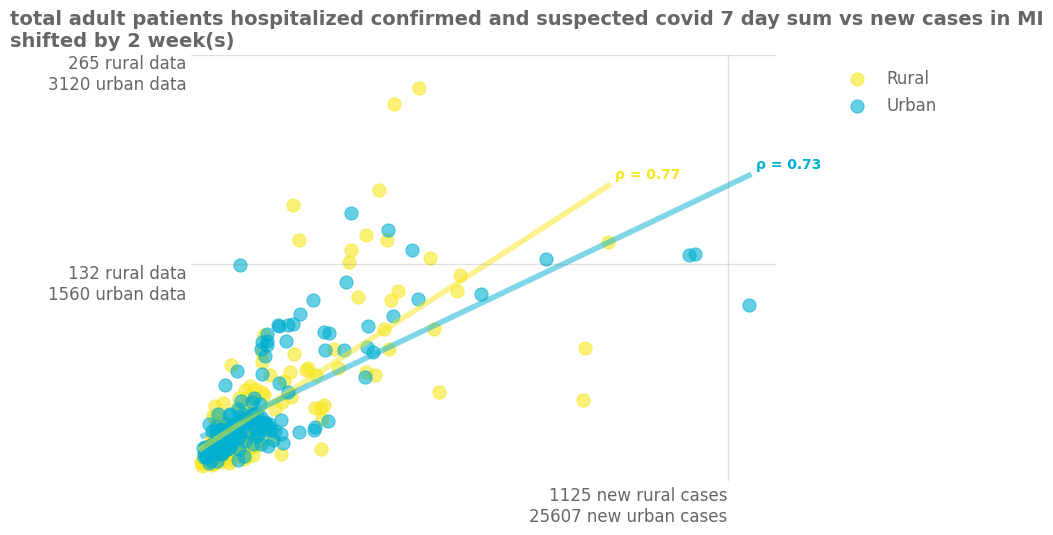

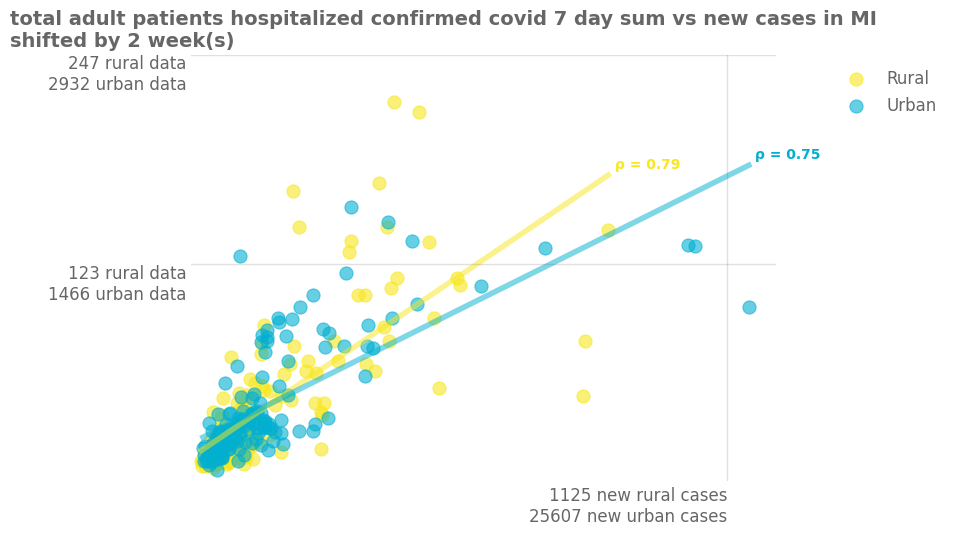

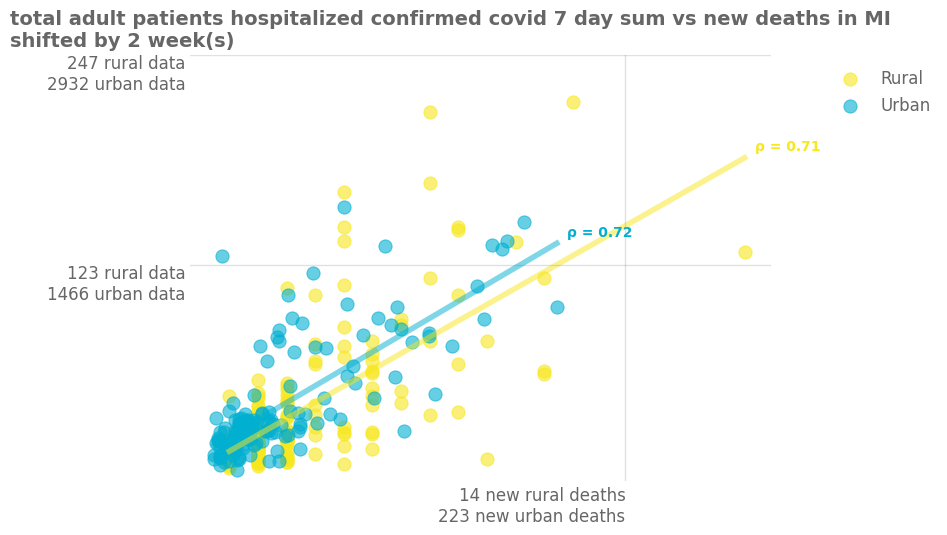

In [40]:
outputs_MI_2wshift = main(df_d, df_h, county_df, columns_d, columns_h, 'MI', shift=2, display_corr_charts=True)

#### now just to explore a few more states, let's check out a few below

### New York

In [35]:
outputs_NY = main(df_d, df_h, county_df, columns_d, columns_h, 'NY', display_corr_charts=True)


creating sub hospital dataframe for NY

sub dataframe complete

creating sub covid cases/deaths dataframe for NY

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 327 by 47

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW DEATHS:
---
No highly cor

### Washington

In [36]:
outputs_WA = main(df_d, df_h, county_df, columns_d, columns_h, state='WA', display_corr_charts=True)


creating sub hospital dataframe for WA

sub dataframe complete

creating sub covid cases/deaths dataframe for WA

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 330 by 46

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW DEATHS:
---
No highly cor

very interestingly, Washington has `No highly correlated columns found`, most likely due to a lack of data for this state

### Texas

In [37]:
outputs_TX = main(df_d, df_h, county_df, columns_d, columns_h, state='TX', display_corr_charts=True)


creating sub hospital dataframe for TX

sub dataframe complete

creating sub covid cases/deaths dataframe for TX

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 333 by 47

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW DEATHS:
---
No highly cor

### Florida

In [38]:
outputs_FL = main(df_d, df_h, county_df, columns_d, columns_h, state='FL', display_corr_charts=True)


creating sub hospital dataframe for FL

sub dataframe complete

creating sub covid cases/deaths dataframe for FL

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 328 by 47

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
inpatient_beds_used_covid_7_day_sum has 131 data points

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
inpatient_beds_used_covid_7_day_sum has 164 data points

Highly correlated columns for URB

### California

In [39]:
outputs_CA = main(df_d, df_h, county_df, columns_d, columns_h, state='CA', display_corr_charts=True)


creating sub hospital dataframe for CA

sub dataframe complete

creating sub covid cases/deaths dataframe for CA

sub dataframe complete

aggregating hospital data

aggregating covid cases/deaths data

merging dataframes on week, year, and is_metro_micro
The shape of the merged_df is 328 by 47

finding high correlating columns to covid cases and deaths

checking if found high correlation columns are normally distributed
None of the rural data is normally distributed (reject H0)
None of the urban data is normally distributed (reject H0)
None of the data is normally distributed, rerunning the correlation with spearman method

Highly correlated columns for RURAL areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for RURAL areas and NEW DEATHS:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW CASES:
---
No highly correlated columns found

Highly correlated columns for URBAN areas and NEW DEATHS:
---
No highly cor

Interesting, only a handful of instances exhibited strong correlations between both rural and urban regions and any given variable. This phenomenon was particularly pronounced, with very few states demonstrating strong correlations in both urban and rural contexts. This observation suggests the distinctive nature of Michigan, wherein rural and urban regions exhibit closer similarity in COVID-19 trends compared to other states.
